# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/Users/SandeepGangundi/Documents/Courses/Udacity/Nanodegree Self Driving Car/Term1/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/train.p'
testing_file = '/Users/SandeepGangundi/Documents/Courses/Udacity/Nanodegree Self Driving Car/Term1/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = (np.unique(y_train)).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import pandas as pd
# Visualizations will be shown in the notebook.
%matplotlib inline

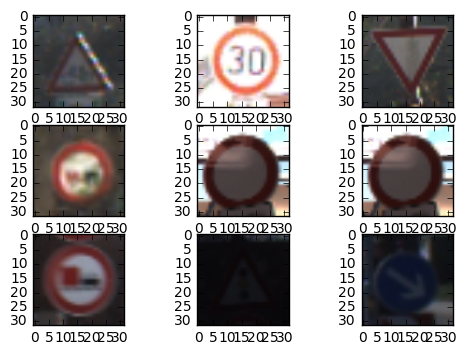

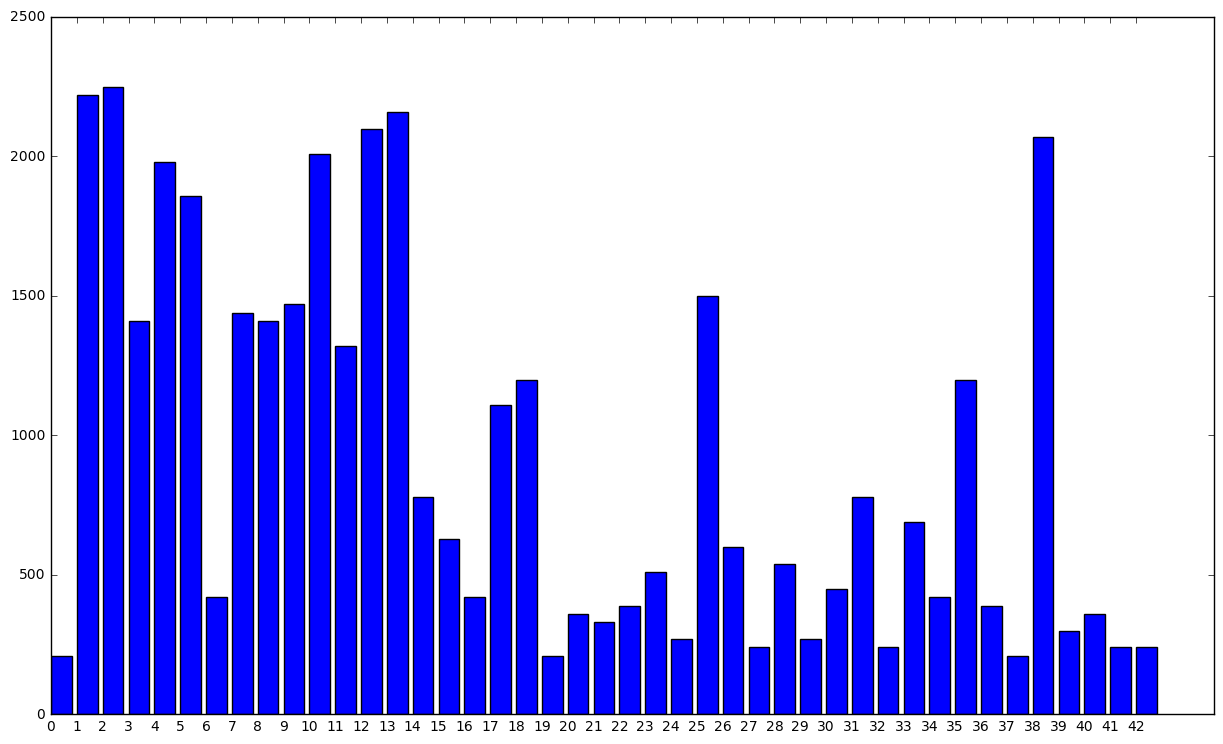

In [82]:
size = 3
for i in range(1,size*size + 1):
    idx = np.random.randint(0, n_train)
    plt.subplot(size,size,i)
    plt.imshow(X_train[idx])

df = pd.DataFrame(y_train).pivot_table(columns=0, aggfunc='size')
x = df.index.values
y = df.values
plt.figure(figsize=(15,9))
plt.bar(x,y)
plt.xticks(x)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Data was pre-processed by just shuffling the data. This is to make sure the order of the data present in the training set does not influence the training of the model.

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Training and Test data is provided to us. We need validation data. This was generated by splitting the training set into training and validation sets. We need validation sets to test our trained data and then change our training parameters accordingly, since we should not use the test data for training or adjusting the parameters anytime.

This was done using train_test_split from sklearn library.

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [6]:
### SETUP TENSORFLOW ###
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128

In [7]:
### LENET - 6 ###
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 250.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 250), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(250))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 250. Output = 120.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(250, 120), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(120))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 120. Output = 84.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(84))
    fc3    = tf.matmul(fc2, fc3_W) + fc3_b
    
    # SOLUTION: Activation.
    fc3    = tf.nn.relu(fc3)

    # SOLUTION: Layer 6: Fully Connected. Input = 84. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I started with LeNet-5 architecture and modified it to give better accuracy for current dataset.
##### LeNet-6
I added an extra fully connected layer with input size 400 and output size 250. I also increased epochs to 20 as over time the accuracy improved more. With these changes and keeping batch size to 128, accuracy increased to almost 97%.

In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.

### FEATURES & LABELS ###
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### TRAINING PIPELINE ###
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### MODEL EVALUATION ###
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### TRAIN THE MODEL ###
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...

EPOCH 1 ...
Validation Accuracy = 0.698

EPOCH 2 ...
Validation Accuracy = 0.792

EPOCH 3 ...
Validation Accuracy = 0.833

EPOCH 4 ...
Validation Accuracy = 0.898

EPOCH 5 ...
Validation Accuracy = 0.907

EPOCH 6 ...
Validation Accuracy = 0.931

EPOCH 7 ...
Validation Accuracy = 0.923

EPOCH 8 ...
Validation Accuracy = 0.926

EPOCH 9 ...
Validation Accuracy = 0.940

EPOCH 10 ...
Validation Accuracy = 0.941

EPOCH 11 ...
Validation Accuracy = 0.942

EPOCH 12 ...
Validation Accuracy = 0.938

EPOCH 13 ...
Validation Accuracy = 0.938

EPOCH 14 ...
Validation Accuracy = 0.950

EPOCH 15 ...
Validation Accuracy = 0.946

EPOCH 16 ...
Validation Accuracy = 0.943

EPOCH 17 ...
Validation Accuracy = 0.946

EPOCH 18 ...
Validation Accuracy = 0.954

EPOCH 19 ...
Validation Accuracy = 0.942

EPOCH 20 ...
Validation Accuracy = 0.958

Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

##### Optimizer
Optimizer used is Adam Optimizer of Tensorflow which very similar but better than SGD as it converges faster than SGD.

##### Batch size
Batch size used is 128. Increasing or decreasing batch size did not yield better results.

##### Epochs
I started with epochs as 10, and later 15. However I found that setting it to 20 gave better results.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

It was indeed a lot of trial and error. Initially I played around with batch size and epochs and found that epochs of 15 and batch size of 128 gave the best results so far.

Later I remembered from the lecture that by adding another hidden layer, sometimes the network behaves much better though training time increases. I decided to add just one hidden layer with input size 400 and output size 250 which was fully connected. With this one extra layer accuracy improved from 95.5% to 96.6%. 

I then decided to increase epochs to 20 which gave much better accuracy of 97%.

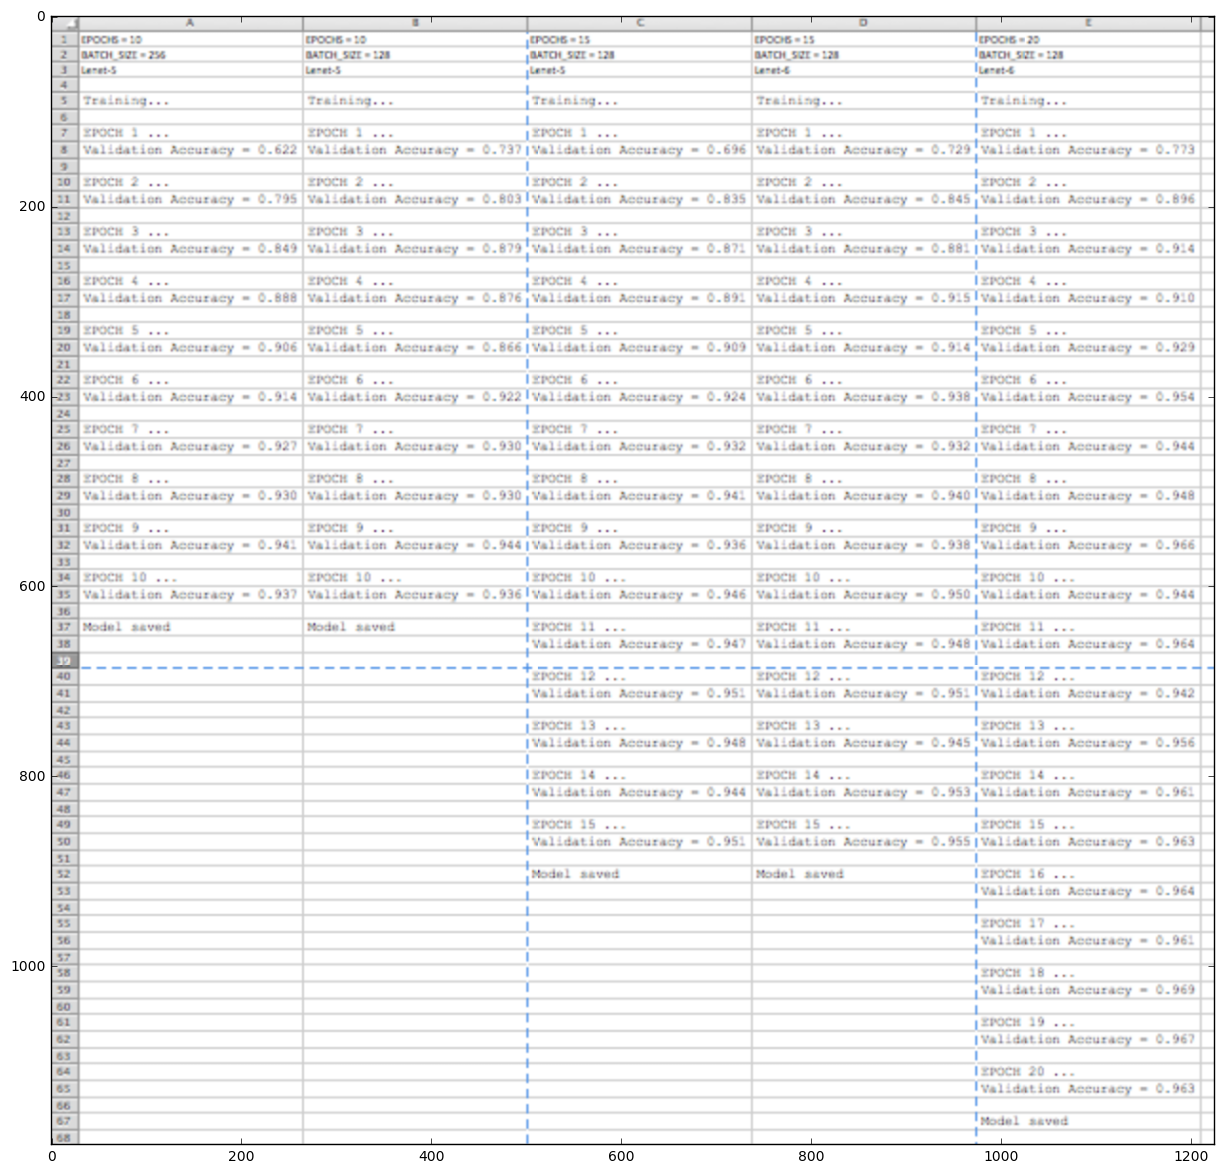

In [9]:
import matplotlib.image as mpimg
image = (mpimg.imread('Comparison.png'))
plt.figure(figsize=(15,15))
plt.imshow(image)

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

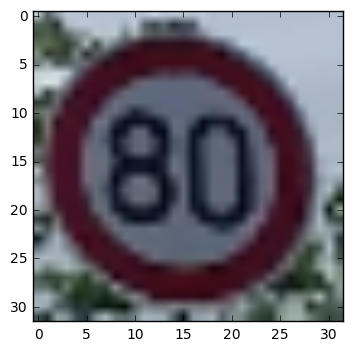

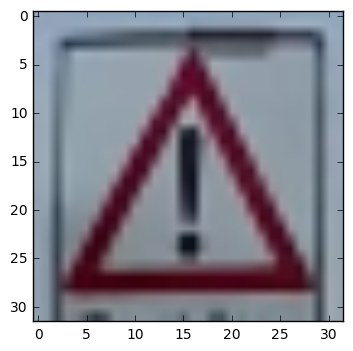

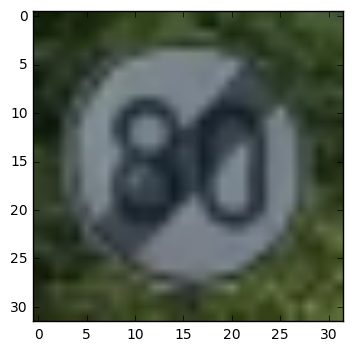

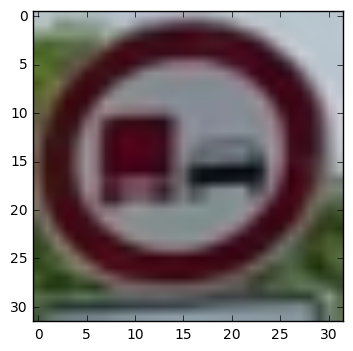

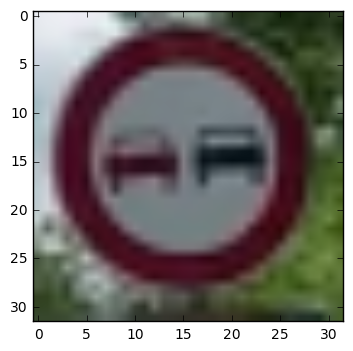

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import cv2

def process_image(file):
    image = cv2.imread(file)
    image = cv2.resize(image,(32, 32))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    return image

images = [process_image("./test_images/"+name) for name in os.listdir("./test_images/")]
for img in images:
    plt.figure()
    plt.imshow(img)

images = np.array(images)
labels = np.array([5, 18, 6, 10, 9])



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I choose 5 images of german traffic signs based off some youtube videos of german dashboard cam. I thought it should be pretty straigtforward to classify these images. Only problem could be between 1st and 3rd image as both are very similar, one is for 80kmph speed limit and another for ending 80kmph. However based on my tests below I was suprised to see the results. I have elaborated my results below.

In [49]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Evaluate for Given Test data ###
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy for given test = {:.3f}".format(test_accuracy))

### Evaluate for new 5 test images created ###

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(images, labels)
    print("Test Accuracy for created test = {:.3f}".format(test_accuracy))



Test Accuracy for given test = 0.872
Test Accuracy for created test = 0.600


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

My model is giving very low accuracy on the 5 test images I chose as it is not able to classify 2 out of those 5 images properly.

Accuracy for 5 test images = 60% 

True Class: [5]
Predicted Class: [3]
[  1.31066494e-11   5.21117996e-04   3.78866001e-11   9.91701424e-01
   1.98352034e-12   7.77740171e-03   6.31336372e-11   3.74029198e-20
   3.21738384e-17   1.68317374e-23   7.17287555e-26   1.15094880e-19
   9.56773510e-18   2.07028479e-22   1.33162336e-21   1.90510620e-21
   1.09445784e-27   3.40620229e-25   2.88233346e-21   7.83037781e-25
   3.67277026e-17   7.39375972e-20   9.75005721e-30   4.46240464e-22
   9.51647900e-34   4.89404479e-21   6.92819725e-35   1.13594475e-33
   2.10360000e-23   4.32649342e-16   1.00341445e-37   9.12705580e-14
   2.26183658e-08   7.20883282e-27   1.74431348e-21   8.14942244e-17
   1.22604431e-18   1.63342381e-31   2.88863761e-23   1.72408095e-24
   1.70936938e-20   1.98337335e-19   7.24740191e-21]


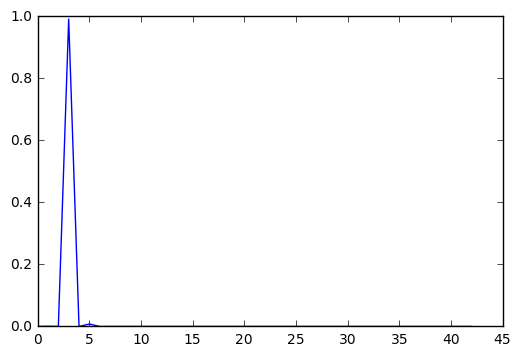

True Class: [18]
Predicted Class: [18]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   2.11164451e-30
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   2.52615401e-35   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   3.27787330e-15   8.12915678e-26
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.83140409e-31
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]


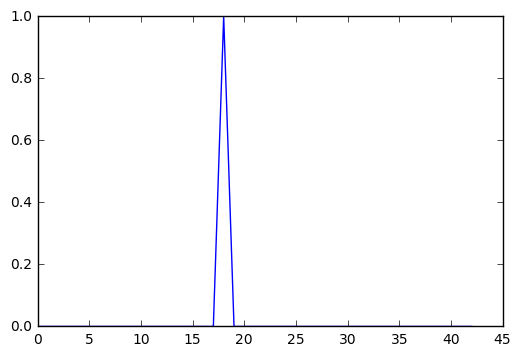

True Class: [6]
Predicted Class: [6]
[  2.19751411e-15   3.21859687e-07   4.05831320e-13   3.69979200e-16
   5.34349007e-14   7.51723336e-12   9.73977387e-01   1.34717286e-22
   2.15895778e-17   4.22048390e-21   1.73613918e-20   7.10956328e-06
   7.44978245e-03   2.16229479e-18   5.33357538e-13   8.58159496e-23
   3.99527848e-29   1.03142588e-20   5.21737832e-07   2.33402369e-18
   1.11835698e-18   4.51600834e-13   8.68431543e-29   1.11548789e-21
   8.67298670e-23   8.02223951e-16   1.89251936e-15   6.76574184e-17
   4.40065214e-18   8.12617387e-20   8.90310772e-17   1.15763315e-15
   1.85648985e-02   1.30426641e-14   2.94703078e-17   6.51430170e-16
   1.09251919e-14   1.16897772e-19   9.70836435e-14   4.44958598e-19
   2.37430371e-11   6.07301075e-14   1.05513370e-18]


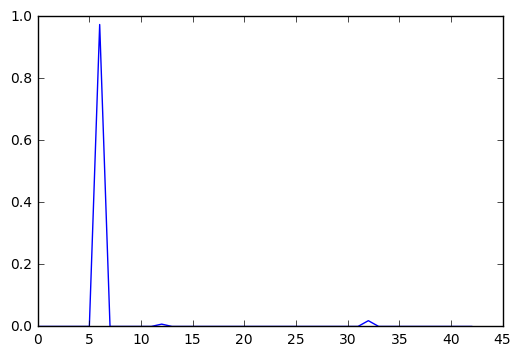

True Class: [10]
Predicted Class: [9]
[  0.00000000e+00   5.22242424e-30   1.98421260e-31   1.49869068e-20
   0.00000000e+00   2.66538753e-17   0.00000000e+00   6.47966727e-27
   1.37623033e-36   1.00000000e+00   6.54740651e-10   1.27517143e-14
   2.65224146e-33   2.52622552e-32   0.00000000e+00   6.66087895e-23
   3.73844422e-09   0.00000000e+00   1.90718010e-23   3.26812275e-22
   5.53528614e-23   2.71489246e-38   0.00000000e+00   7.93499886e-19
   3.97306945e-16   3.50853631e-31   5.28067592e-24   6.10489671e-27
   1.19634973e-16   3.50436125e-17   1.40375634e-33   1.27616098e-34
   0.00000000e+00   1.04079372e-34   0.00000000e+00   2.55447805e-36
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   7.66484862e-21   4.14701574e-17   3.42436773e-19]


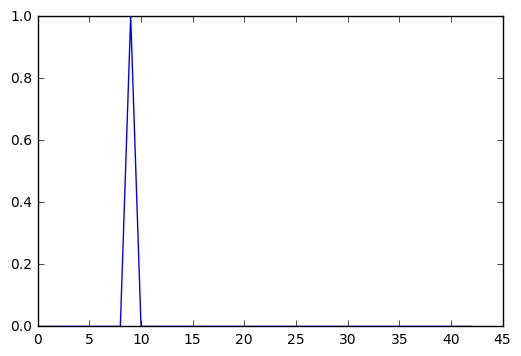

True Class: [9]
Predicted Class: [9]
[  2.11400013e-28   4.92380774e-22   4.61283751e-22   1.21212977e-15
   1.60639149e-32   6.04091987e-17   1.13075393e-34   1.78354758e-25
   6.72935018e-23   1.00000000e+00   1.62001738e-23   2.21206445e-15
   5.11241378e-23   3.71327421e-27   2.47092448e-34   3.81448503e-16
   2.80711248e-18   0.00000000e+00   3.37554290e-12   7.58856736e-13
   3.27880622e-18   4.85533522e-30   8.50529011e-33   6.75501000e-18
   4.35798272e-12   5.97853583e-26   2.31934507e-13   4.28917492e-12
   5.41565545e-13   1.24978537e-17   9.12443780e-38   2.50345871e-26
   2.53755276e-26   1.03005895e-25   1.55101988e-35   3.29352321e-33
   1.42421303e-36   5.72559232e-29   5.34561792e-30   3.57433371e-34
   2.25009473e-11   7.05773059e-13   2.61664577e-26]


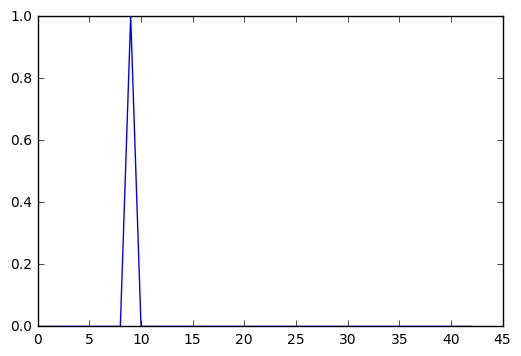

In [80]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
soft_max = tf.nn.softmax(logits)

def get_softmax(x_data, y_data):
    sess = tf.get_default_session()
    sm = sess.run(soft_max, feed_dict={x: x_data, y: y_data})
    return sm

size = len(images)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    for i in range(1, size+1):
        batch_x = images[i-1:i]
        batch_y = labels[i-1:i]
        sm = get_softmax(batch_x, batch_y)
        print("True Class: "+str(batch_y))
        print("Predicted Class: "+str(tf.argmax(sm, 1).eval()))
        print(sm[0])
        plt.figure()
        plt.plot(sm[0])
        #plt.axis([0, 45, 1e-50, 1])
        plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Using softmax probabilities and tf.nn.top_k() function, the model is uncertain of image #1 and image #4.<BR>
Below are the results:

##### Test image 1
This image true class is 5, however the model predicted 3. The true class is present in the top 5 results.<BR>
True Class: [5]<BR>
Predicted Class: [3]<BR>
TOP 5 Predicted Classes: [[ 3  5  1 32  6]]

##### Test image 4
This image true class is 10, however the model predicted 9. The true class is present in the top 5 results.<BR>
True Class: [10]<BR>
Predicted Class: [9]<BR>
TOP 5 Predicted Classes: [[ 9 16 10 11 24]]

True Class: [5]
Predicted Class: [3]
TOP 5 Predicted Classes: [[ 3  5  1 32  6]]
[  1.31066494e-11   5.21117996e-04   3.78866001e-11   9.91701424e-01
   1.98352034e-12   7.77740171e-03   6.31336372e-11   3.74029198e-20
   3.21738384e-17   1.68317374e-23   7.17287555e-26   1.15094880e-19
   9.56773510e-18   2.07028479e-22   1.33162336e-21   1.90510620e-21
   1.09445784e-27   3.40620229e-25   2.88233346e-21   7.83037781e-25
   3.67277026e-17   7.39375972e-20   9.75005721e-30   4.46240464e-22
   9.51647900e-34   4.89404479e-21   6.92819725e-35   1.13594475e-33
   2.10360000e-23   4.32649342e-16   1.00341445e-37   9.12705580e-14
   2.26183658e-08   7.20883282e-27   1.74431348e-21   8.14942244e-17
   1.22604431e-18   1.63342381e-31   2.88863761e-23   1.72408095e-24
   1.70936938e-20   1.98337335e-19   7.24740191e-21]


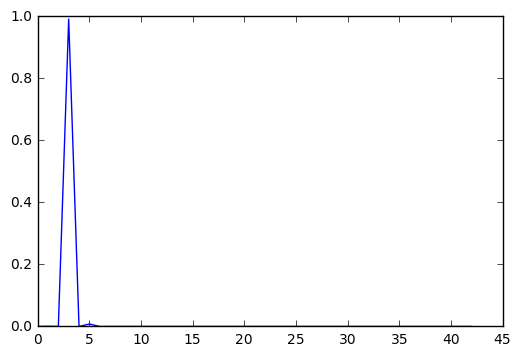

True Class: [18]
Predicted Class: [18]
TOP 5 Predicted Classes: [[18 26 27 11 31]]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   2.11164451e-30
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   2.52615401e-35   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   3.27787330e-15   8.12915678e-26
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.83140409e-31
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]


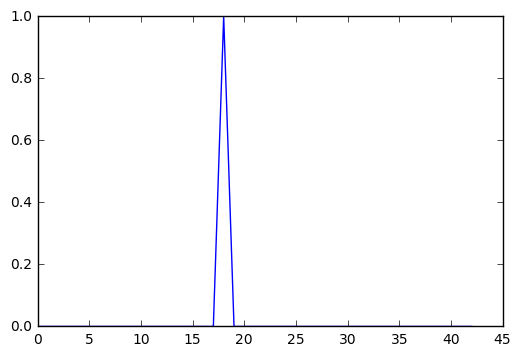

True Class: [6]
Predicted Class: [6]
TOP 5 Predicted Classes: [[ 6 32 12 11 18]]
[  2.19751411e-15   3.21859687e-07   4.05831320e-13   3.69979200e-16
   5.34349007e-14   7.51723336e-12   9.73977387e-01   1.34717286e-22
   2.15895778e-17   4.22048390e-21   1.73613918e-20   7.10956328e-06
   7.44978245e-03   2.16229479e-18   5.33357538e-13   8.58159496e-23
   3.99527848e-29   1.03142588e-20   5.21737832e-07   2.33402369e-18
   1.11835698e-18   4.51600834e-13   8.68431543e-29   1.11548789e-21
   8.67298670e-23   8.02223951e-16   1.89251936e-15   6.76574184e-17
   4.40065214e-18   8.12617387e-20   8.90310772e-17   1.15763315e-15
   1.85648985e-02   1.30426641e-14   2.94703078e-17   6.51430170e-16
   1.09251919e-14   1.16897772e-19   9.70836435e-14   4.44958598e-19
   2.37430371e-11   6.07301075e-14   1.05513370e-18]


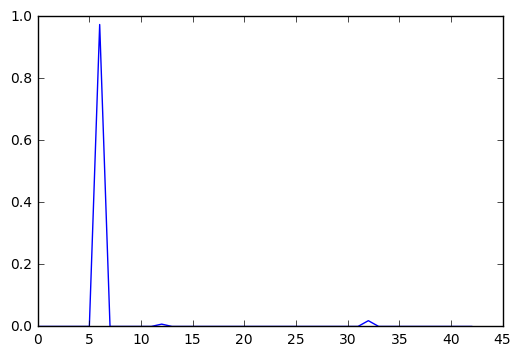

True Class: [10]
Predicted Class: [9]
TOP 5 Predicted Classes: [[ 9 16 10 11 24]]
[  0.00000000e+00   5.22242424e-30   1.98421260e-31   1.49869068e-20
   0.00000000e+00   2.66538753e-17   0.00000000e+00   6.47966727e-27
   1.37623033e-36   1.00000000e+00   6.54740651e-10   1.27517143e-14
   2.65224146e-33   2.52622552e-32   0.00000000e+00   6.66087895e-23
   3.73844422e-09   0.00000000e+00   1.90718010e-23   3.26812275e-22
   5.53528614e-23   2.71489246e-38   0.00000000e+00   7.93499886e-19
   3.97306945e-16   3.50853631e-31   5.28067592e-24   6.10489671e-27
   1.19634973e-16   3.50436125e-17   1.40375634e-33   1.27616098e-34
   0.00000000e+00   1.04079372e-34   0.00000000e+00   2.55447805e-36
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   7.66484862e-21   4.14701574e-17   3.42436773e-19]


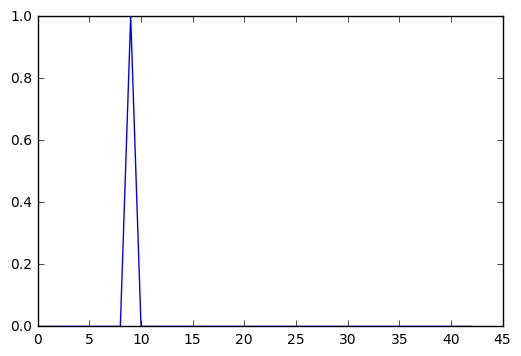

True Class: [9]
Predicted Class: [9]
TOP 5 Predicted Classes: [[ 9 40 24 27 18]]
[  2.11400013e-28   4.92380774e-22   4.61283751e-22   1.21212977e-15
   1.60639149e-32   6.04091987e-17   1.13075393e-34   1.78354758e-25
   6.72935018e-23   1.00000000e+00   1.62001738e-23   2.21206445e-15
   5.11241378e-23   3.71327421e-27   2.47092448e-34   3.81448503e-16
   2.80711248e-18   0.00000000e+00   3.37554290e-12   7.58856736e-13
   3.27880622e-18   4.85533522e-30   8.50529011e-33   6.75501000e-18
   4.35798272e-12   5.97853583e-26   2.31934507e-13   4.28917492e-12
   5.41565545e-13   1.24978537e-17   9.12443780e-38   2.50345871e-26
   2.53755276e-26   1.03005895e-25   1.55101988e-35   3.29352321e-33
   1.42421303e-36   5.72559232e-29   5.34561792e-30   3.57433371e-34
   2.25009473e-11   7.05773059e-13   2.61664577e-26]


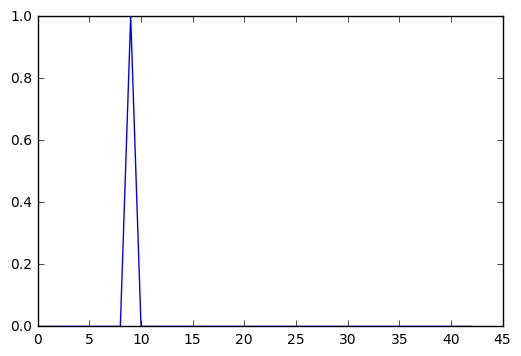

In [82]:
size = len(images)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    for i in range(1, size+1):
        batch_x = images[i-1:i]
        batch_y = labels[i-1:i]
        sm = get_softmax(batch_x, batch_y)
        print("True Class: "+str(batch_y))
        print("Predicted Class: "+str(tf.argmax(sm, 1).eval()))
        top_5 = tf.nn.top_k(sm, 5)
        print("TOP 5 Predicted Classes: "+str(top_5[1].eval()))
        print(sm[0])
        plt.figure()
        plt.plot(sm[0])
        #plt.axis([0, 45, 1e-50, 1])
        plt.show()
        


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.